In [7]:
import pandas as pd

# Load the datasets
file_disneyland = "disneyland-ride_wait_times-2024-(thrill-data)-v1.csv"
file_california_adv = "disney_california_adv-ride_wait_times-2024-(thrill-data)-v2.csv"

# Read the datasets
df_disneyland = pd.read_csv(file_disneyland)
df_california_adv = pd.read_csv(file_california_adv)

# Check the first few rows of each dataset
print("Disneyland Dataset:")
print(df_disneyland.head())

print("\nCalifornia Adventure Dataset:")
print(df_california_adv.head())


Disneyland Dataset:
                            Ride      Date/Time  Wait Time
0  Big Thunder Mountain Railroad  4/1/2024 8:05          5
1  Big Thunder Mountain Railroad  4/1/2024 8:10          5
2  Big Thunder Mountain Railroad  4/1/2024 8:15         45
3  Big Thunder Mountain Railroad  4/1/2024 8:20         45
4  Big Thunder Mountain Railroad  4/1/2024 8:25         45

California Adventure Dataset:
                 Ride      Date/Time  Wait Time
0  Goofy's Sky School  4/1/2024 8:05          1
1  Goofy's Sky School  4/1/2024 8:10          1
2  Goofy's Sky School  4/1/2024 8:40          5
3  Goofy's Sky School  4/1/2024 8:45          5
4  Goofy's Sky School  4/1/2024 9:00         10


In [10]:
# Convert 'Date/Time' column to datetime format
df_disneyland['Date/Time'] = pd.to_datetime(df_disneyland['Date/Time'])
df_california_adv['Date/Time'] = pd.to_datetime(df_california_adv['Date/Time'])

# Add 'Hour' and 'Date' columns
df_disneyland['Hour'] = df_disneyland['Date/Time'].dt.hour
df_disneyland['Date'] = df_disneyland['Date/Time'].dt.date

df_california_adv['Hour'] = df_california_adv['Date/Time'].dt.hour
df_california_adv['Date'] = df_california_adv['Date/Time'].dt.date

# Display first few rows to verify changes
print("Disneyland Dataset (Updated):")
print(df_disneyland.head())

print("\nCalifornia Adventure Dataset (Updated):")
print(df_california_adv.head())


Disneyland Dataset (Updated):
                            Ride           Date/Time  Wait Time  Hour  \
0  Big Thunder Mountain Railroad 2024-04-01 08:05:00          5     8   
1  Big Thunder Mountain Railroad 2024-04-01 08:10:00          5     8   
2  Big Thunder Mountain Railroad 2024-04-01 08:15:00         45     8   
3  Big Thunder Mountain Railroad 2024-04-01 08:20:00         45     8   
4  Big Thunder Mountain Railroad 2024-04-01 08:25:00         45     8   

         Date  
0  2024-04-01  
1  2024-04-01  
2  2024-04-01  
3  2024-04-01  
4  2024-04-01  

California Adventure Dataset (Updated):
                 Ride           Date/Time  Wait Time  Hour        Date
0  Goofy's Sky School 2024-04-01 08:05:00          1     8  2024-04-01
1  Goofy's Sky School 2024-04-01 08:10:00          1     8  2024-04-01
2  Goofy's Sky School 2024-04-01 08:40:00          5     8  2024-04-01
3  Goofy's Sky School 2024-04-01 08:45:00          5     8  2024-04-01
4  Goofy's Sky School 2024-04-01 09:00:

In [11]:
# Group by 'Hour' and calculate the average wait times for each hour
disneyland_hourly_avg = df_disneyland.groupby('Hour')['Wait Time'].mean().reset_index()
california_adv_hourly_avg = df_california_adv.groupby('Hour')['Wait Time'].mean().reset_index()

# Rename the columns for clarity
disneyland_hourly_avg.rename(columns={'Wait Time': 'Avg Wait Time'}, inplace=True)
california_adv_hourly_avg.rename(columns={'Wait Time': 'Avg Wait Time'}, inplace=True)

# Display the grouped data
print("Disneyland Hourly Average Wait Times:")
print(disneyland_hourly_avg)

print("\nCalifornia Adventure Hourly Average Wait Times:")
print(california_adv_hourly_avg)


Disneyland Hourly Average Wait Times:
    Hour  Avg Wait Time
0      0      13.773147
1      7       9.592559
2      8      15.701323
3      9      22.829381
4     10      32.061212
5     11      36.808412
6     12      37.428279
7     13      37.174447
8     14      36.258822
9     15      34.701647
10    16      35.828784
11    17      32.521797
12    18      33.211532
13    19      32.363187
14    20      29.061980
15    21      21.606869
16    22      19.250544
17    23      15.029845

California Adventure Hourly Average Wait Times:
    Hour  Avg Wait Time
0      0      26.841453
1      7       5.642875
2      8      16.007935
3      9      22.007098
4     10      27.836027
5     11      32.618190
6     12      34.559714
7     13      35.680444
8     14      36.153727
9     15      36.486015
10    16      35.513065
11    17      37.669533
12    18      34.144056
13    19      33.453005
14    20      31.635175
15    21      25.451204
16    22      18.231773
17    23      29.575930


In [13]:
# Pivot data for Disneyland
disneyland_pivot = df_disneyland.groupby(['Date', 'Hour'])['Wait Time'].mean().unstack()

# Pivot data for California Adventure
california_adventure_pivot = df_california_adv.groupby(['Date', 'Hour'])['Wait Time'].mean().unstack()

# Display to verify
print("Disneyland Pivot Table:")
print(disneyland_pivot)

print("\nCalifornia Adventure Pivot Table:")
print(california_adventure_pivot)

Disneyland Pivot Table:
Hour               0          7          8          9          10         11  \
Date                                                                           
2024-01-01        NaN   8.000000  16.507937  21.971831  26.350365  35.805369   
2024-01-02  13.750000   8.125000  25.569106  32.482270  43.092105  47.761194   
2024-01-03  10.000000   6.800000  19.562044  32.532895  45.361842  53.503401   
2024-01-04  14.545455   6.818182  20.454545  34.768212  45.576923  47.705479   
2024-01-05  12.500000   6.000000  16.969466  34.000000  40.935484  47.163121   
...               ...        ...        ...        ...        ...        ...   
2024-12-28  12.500000  10.685714  20.077530  30.461741  43.615385  50.185923   
2024-12-29  12.727273        NaN  19.821569  26.975389  36.528947  47.866492   
2024-12-30  11.875000        NaN  18.881657  28.599476  42.272118  50.015038   
2024-12-31  14.166667   8.800000  27.011594  29.763889  41.951389  43.280387   
2025-01-01  17.5

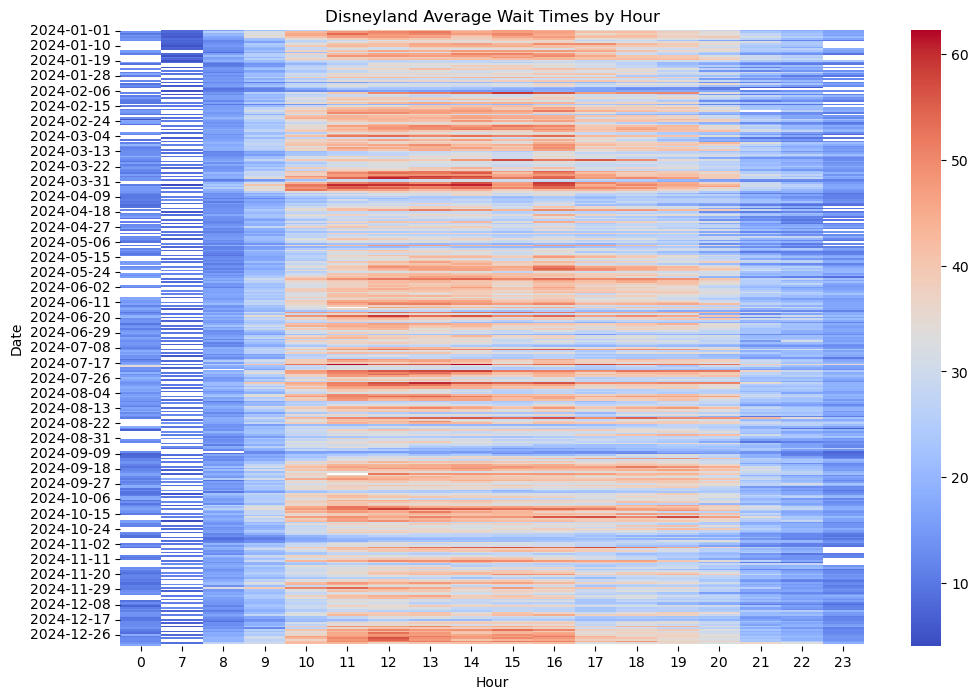

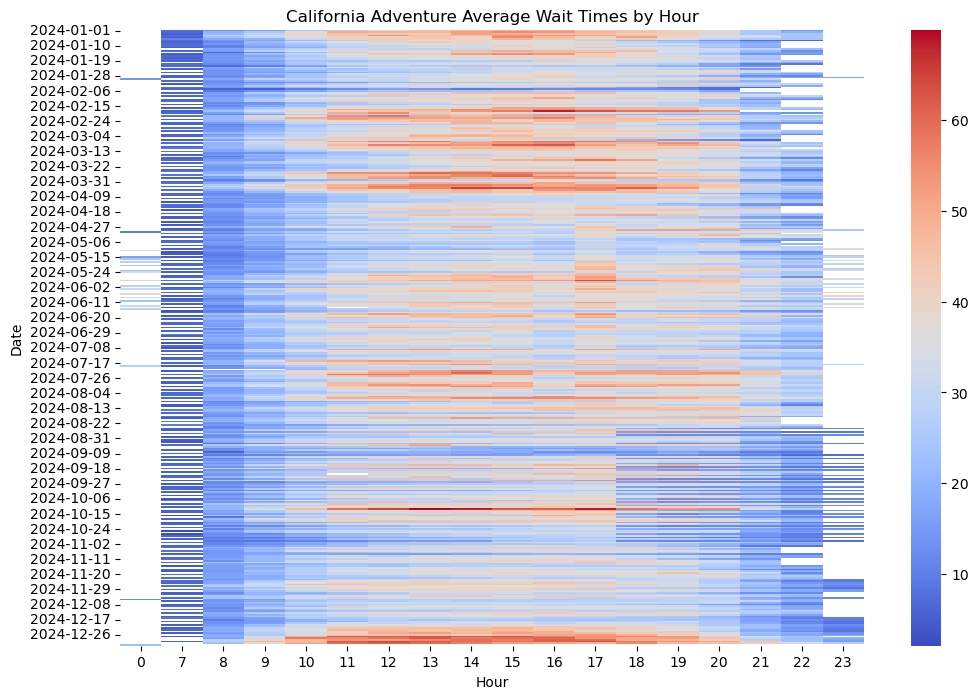

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create heatmap for Disneyland
plt.figure(figsize=(12, 8))
sns.heatmap(disneyland_pivot, cmap="coolwarm", annot=False)
plt.title("Disneyland Average Wait Times by Hour")
plt.xlabel("Hour")
plt.ylabel("Date")
plt.show()

# Create heatmap for California Adventure
plt.figure(figsize=(12, 8))
sns.heatmap(california_adventure_pivot, cmap="coolwarm", annot=False)
plt.title("California Adventure Average Wait Times by Hour")
plt.xlabel("Hour")
plt.ylabel("Date")
plt.show()


In [17]:
# Function to generate and save heatmap for a specific ride
def plot_ride_heatmap(df, ride_name, park_name):
    # Filter data for the selected ride
    df_ride = df[df['Ride'] == ride_name]

    # Check if the ride exists in the dataset
    if df_ride.empty:
        print(f"No data found for {ride_name} in {park_name}.")
        return

    # Pivot data for the heatmap
    ride_pivot = df_ride.groupby(['Date', 'Hour'])['Wait Time'].mean().unstack()

    # Plot the heatmap
    plt.figure(figsize=(12, 8))
    sns.heatmap(ride_pivot, cmap="coolwarm", annot=False, cbar_kws={'label': 'Avg Wait Time (mins)'})
    plt.title(f"{park_name} - {ride_name} Wait Times by Hour", fontsize=14)
    plt.xlabel("Hour")
    plt.ylabel("Date")

    # Save the heatmap as an image
    filename = f"{park_name}_{ride_name.replace(' ', '_')}_heatmap.png"
    plt.savefig(filename, bbox_inches='tight')
    print(f"Heatmap saved as {filename}")
    plt.show()



Creating heatmap for: Big Thunder Mountain Railroad (Disneyland)
Heatmap saved as Disneyland_Big_Thunder_Mountain_Railroad_heatmap.png


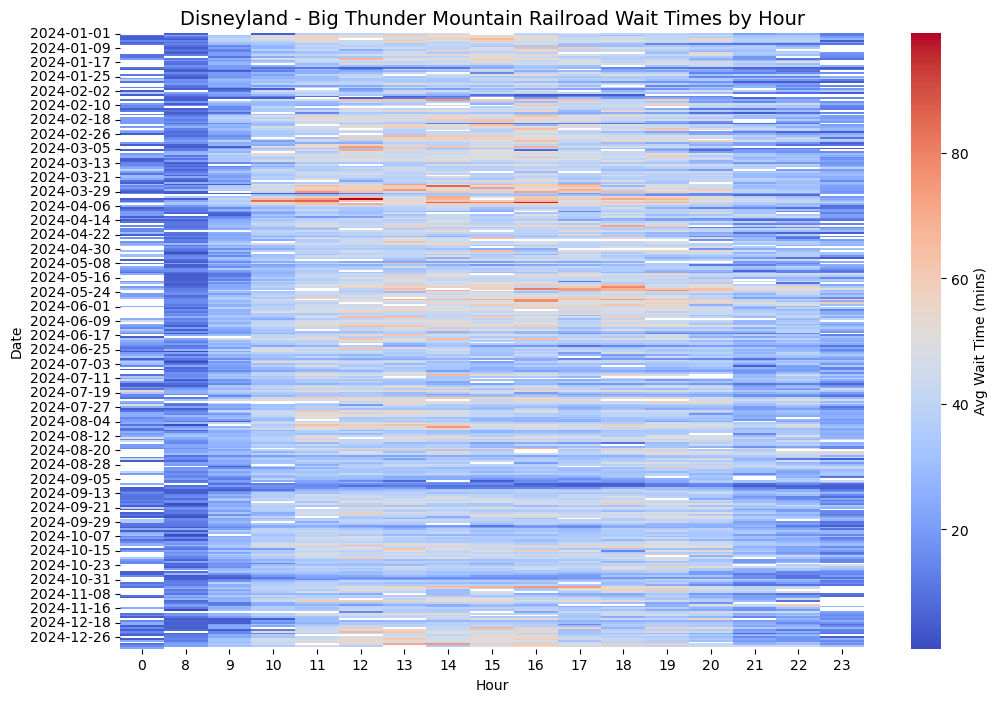

Creating heatmap for: Buzz Lightyear Astro Blasters (Disneyland)
Heatmap saved as Disneyland_Buzz_Lightyear_Astro_Blasters_heatmap.png


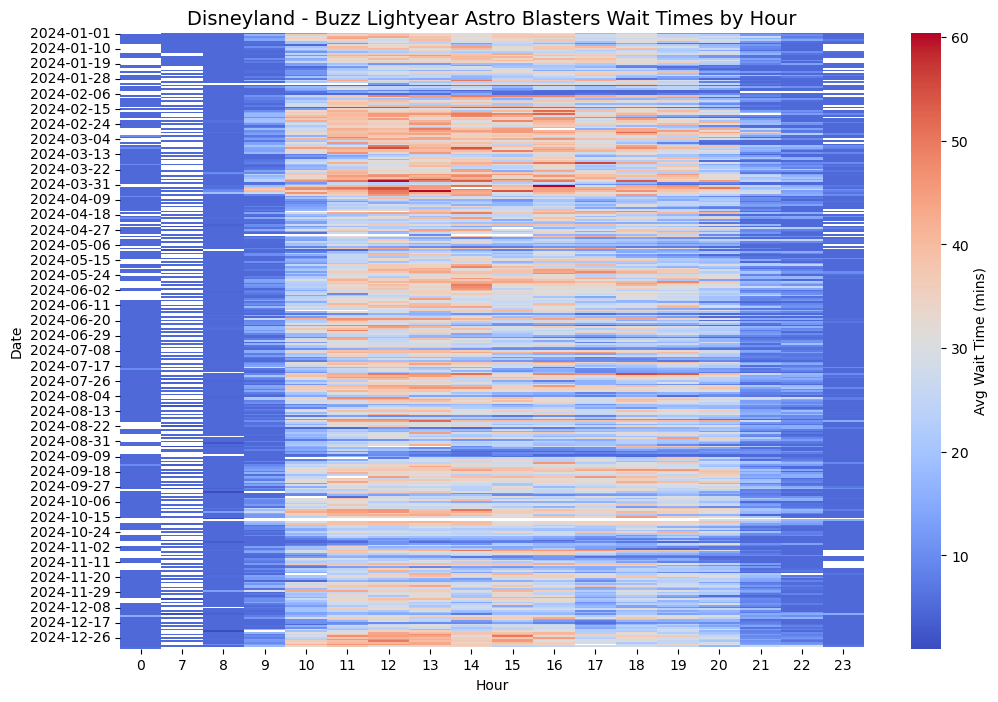

Creating heatmap for: Dumbo the Flying Elephant (Disneyland)
Heatmap saved as Disneyland_Dumbo_the_Flying_Elephant_heatmap.png


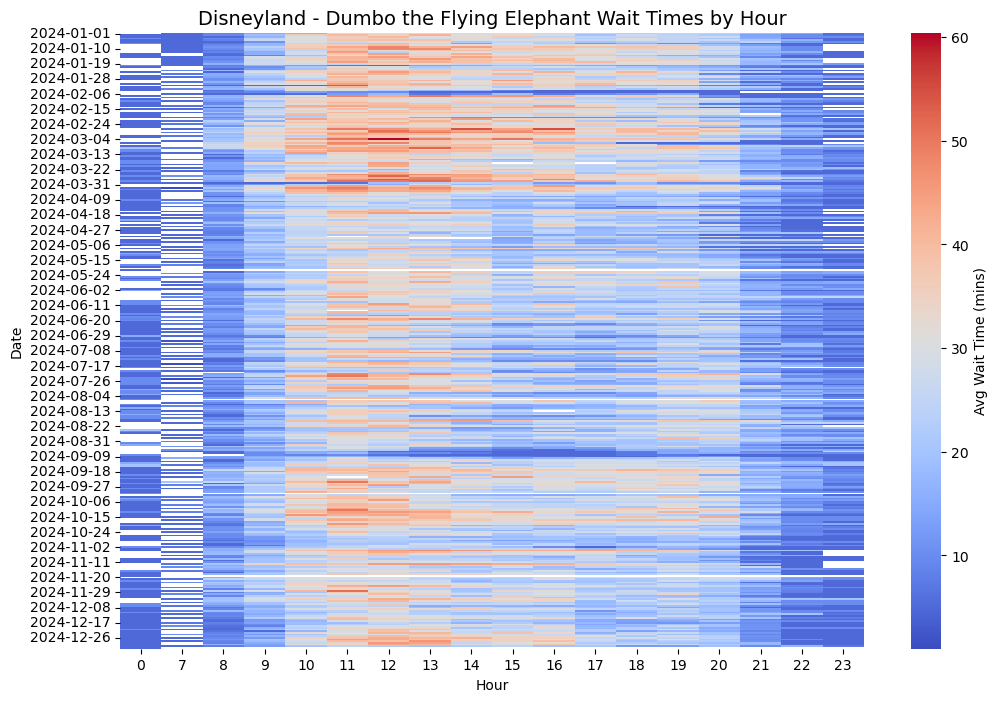

Creating heatmap for: Indiana Jones Adventure (Disneyland)
Heatmap saved as Disneyland_Indiana_Jones_Adventure_heatmap.png


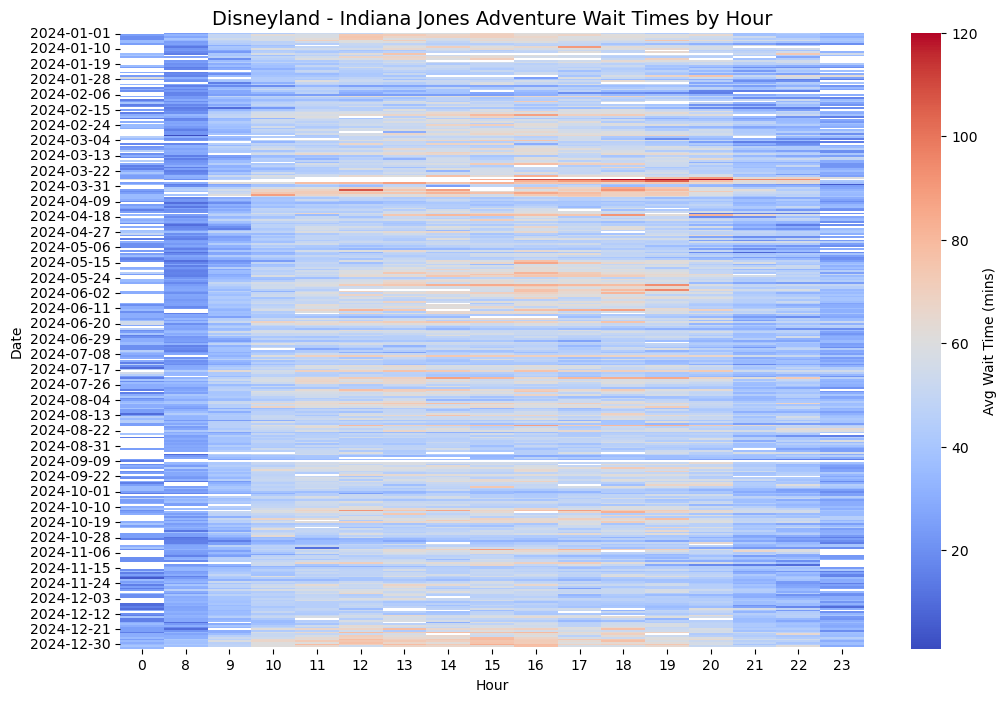

Creating heatmap for: It's A Small World (Disneyland)
Heatmap saved as Disneyland_It's_A_Small_World_heatmap.png


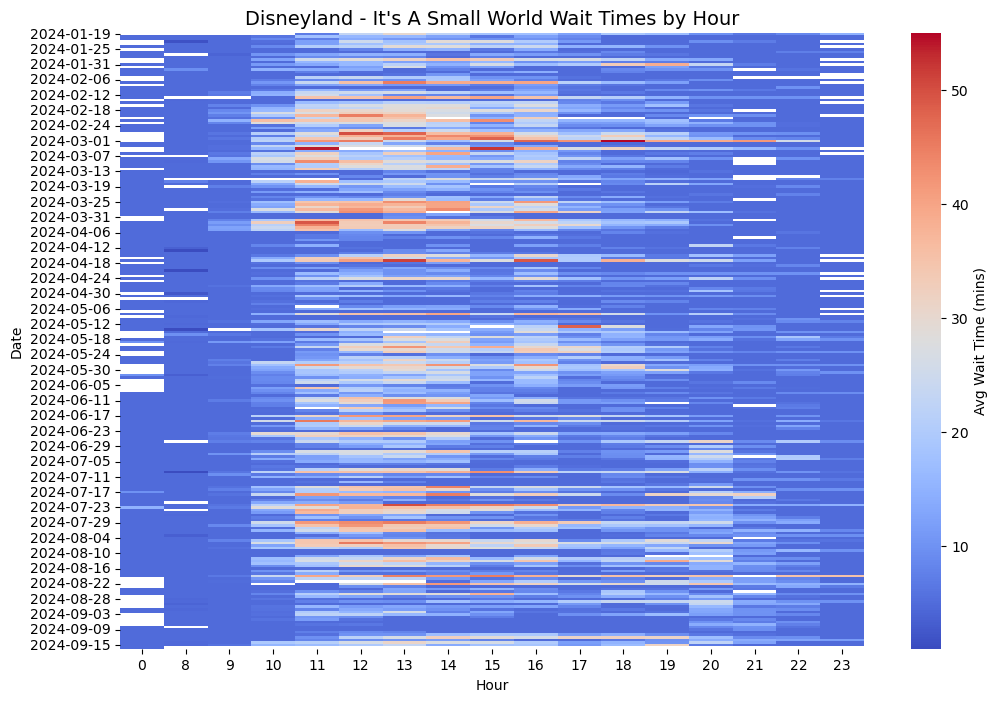

Creating heatmap for: Jungle Cruise (Disneyland)
Heatmap saved as Disneyland_Jungle_Cruise_heatmap.png


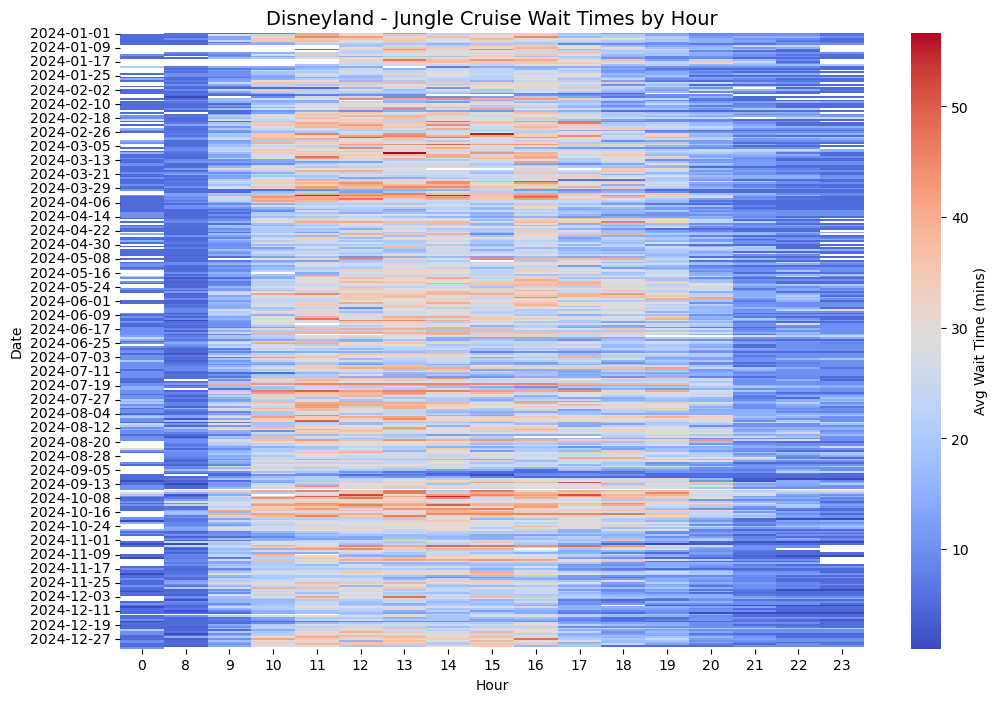

Creating heatmap for: Mickey and Minnie's Runaway Railway (Disneyland)
Heatmap saved as Disneyland_Mickey_and_Minnie's_Runaway_Railway_heatmap.png


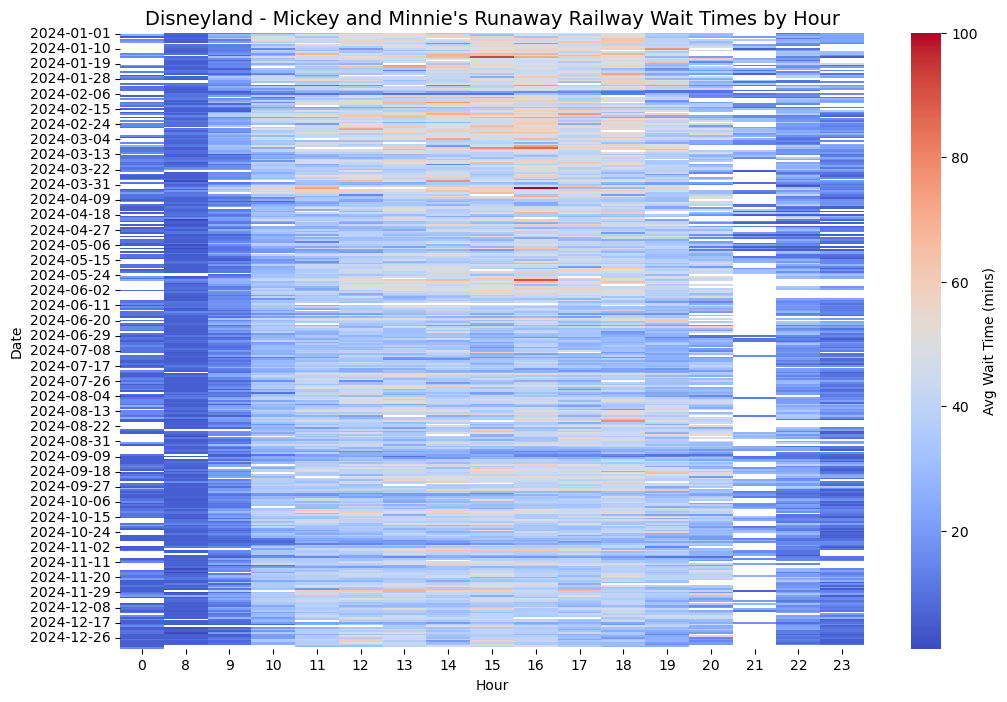

Creating heatmap for: Millennium Falcon: Smugglers Run (Disneyland)
Heatmap saved as Disneyland_Millennium_Falcon:_Smugglers_Run_heatmap.png


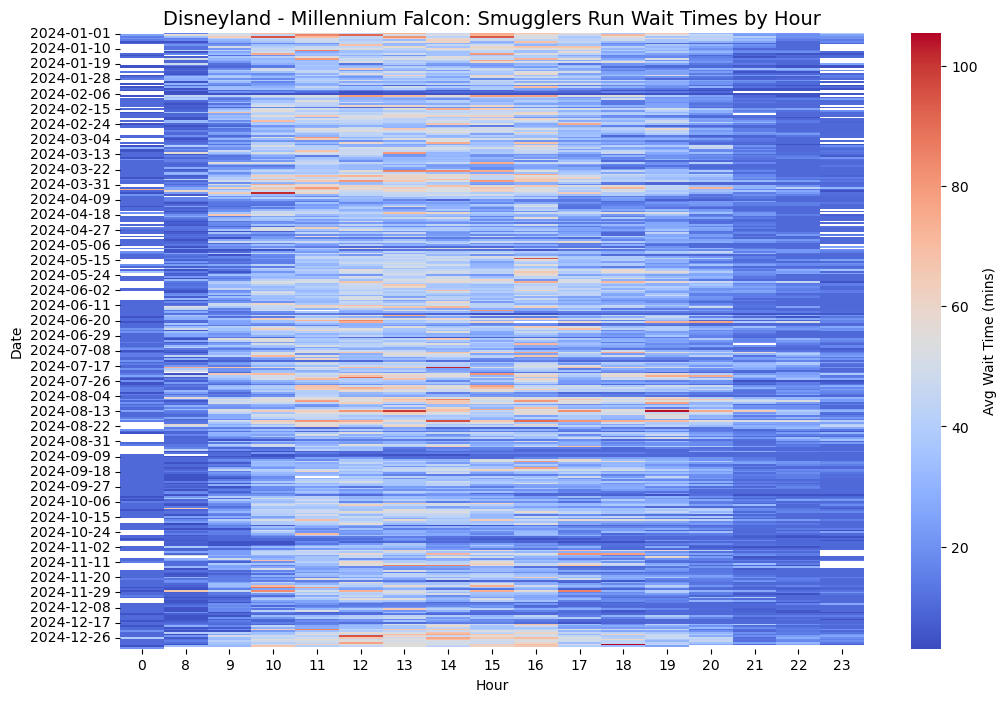

Creating heatmap for: Peter Pan's Flight (Disneyland)
Heatmap saved as Disneyland_Peter_Pan's_Flight_heatmap.png


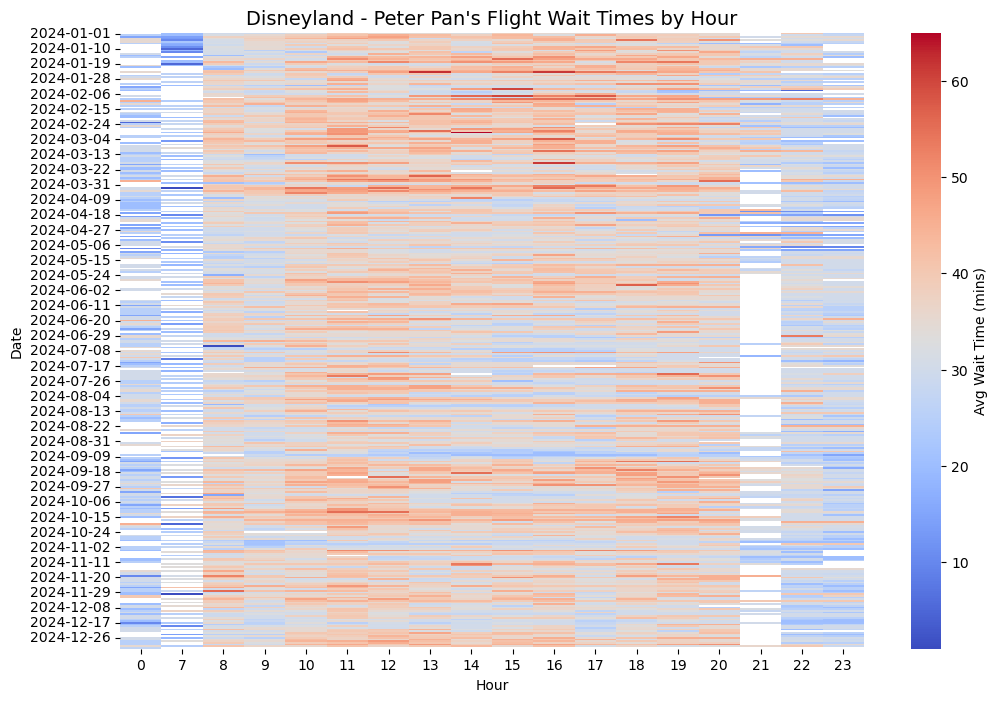

Creating heatmap for: Pirates of the Caribbean (Disneyland)
Heatmap saved as Disneyland_Pirates_of_the_Caribbean_heatmap.png


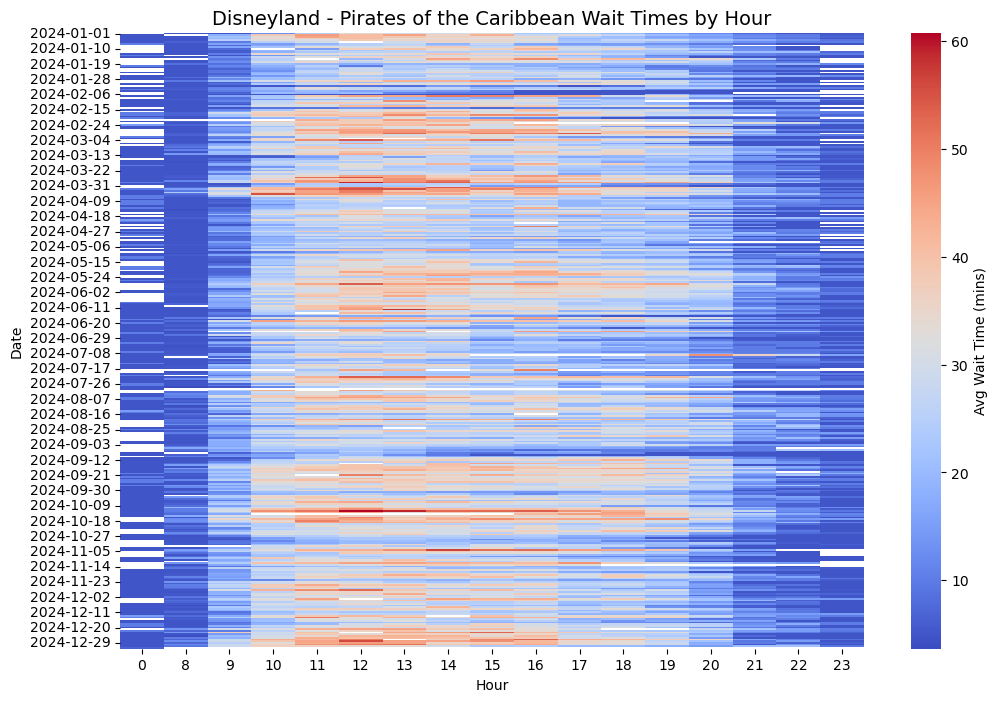

Creating heatmap for: Space Mountain (Disneyland)
Heatmap saved as Disneyland_Space_Mountain_heatmap.png


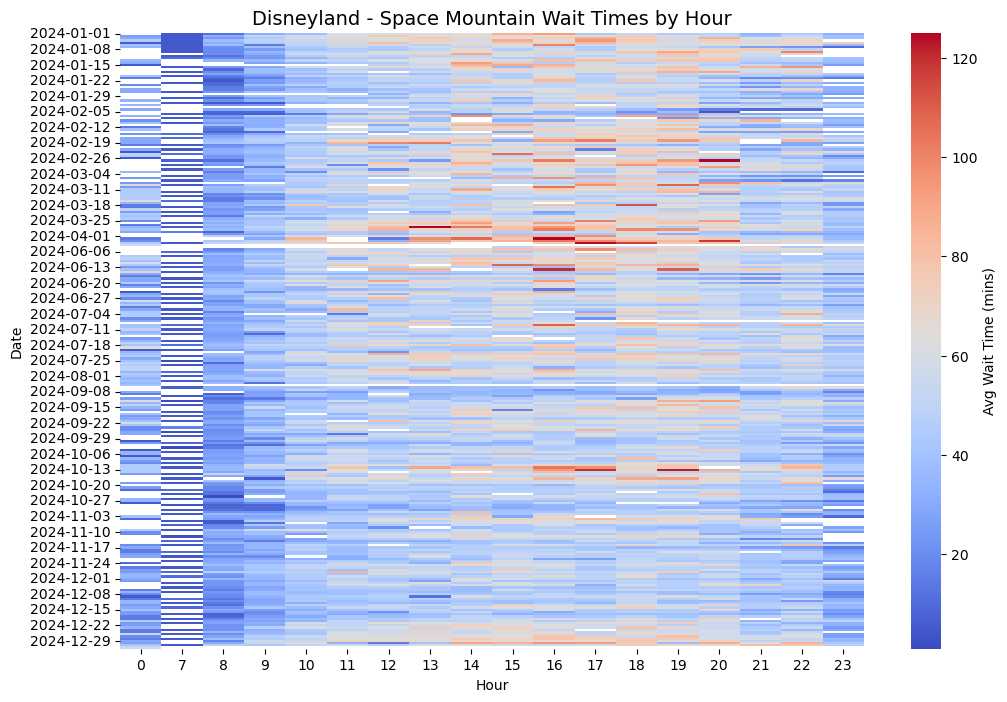

Creating heatmap for: Star Tours - The Adventure Continues (Disneyland)
Heatmap saved as Disneyland_Star_Tours_-_The_Adventure_Continues_heatmap.png


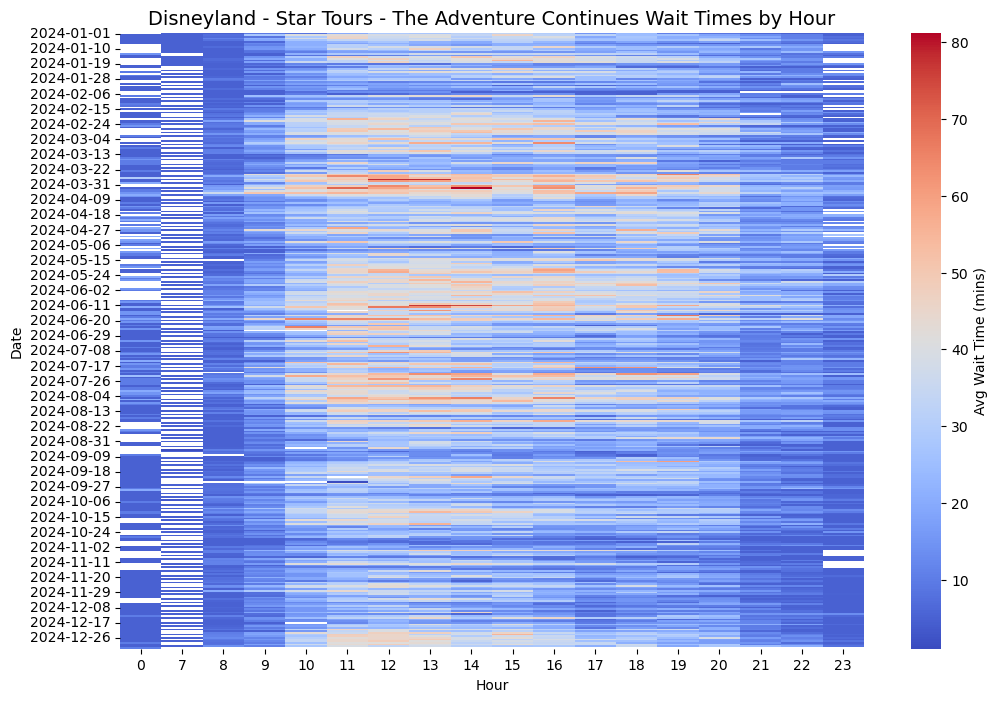

Creating heatmap for: Star Wars: Rise of the Resistance (Disneyland)
Heatmap saved as Disneyland_Star_Wars:_Rise_of_the_Resistance_heatmap.png


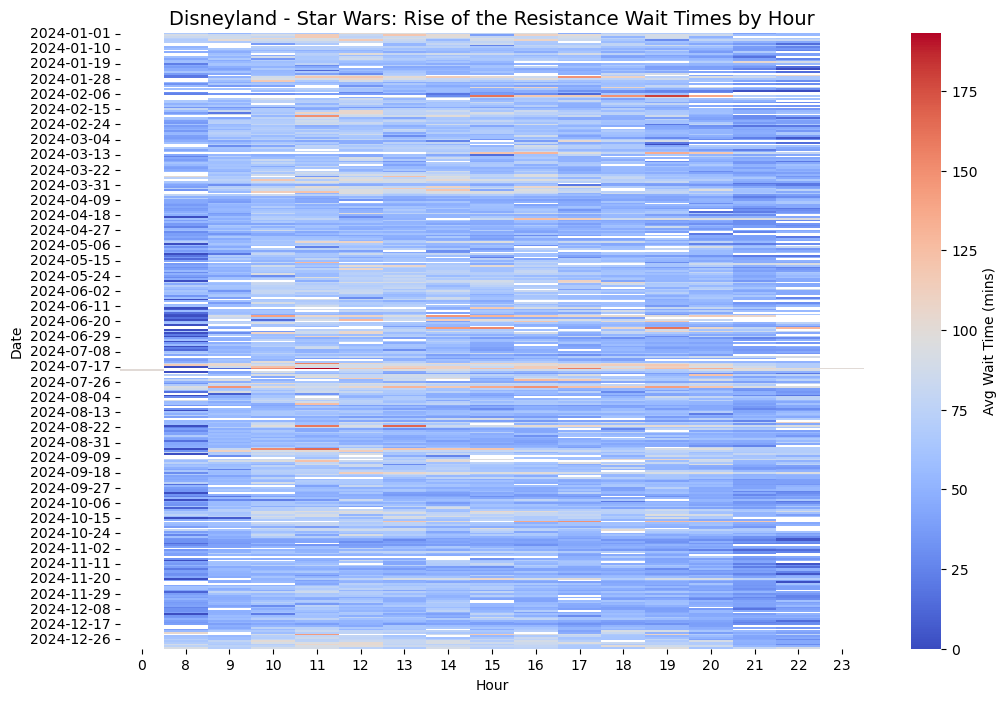

Creating heatmap for: The Many Adventures of Winnie the Pooh (Disneyland)
Heatmap saved as Disneyland_The_Many_Adventures_of_Winnie_the_Pooh_heatmap.png


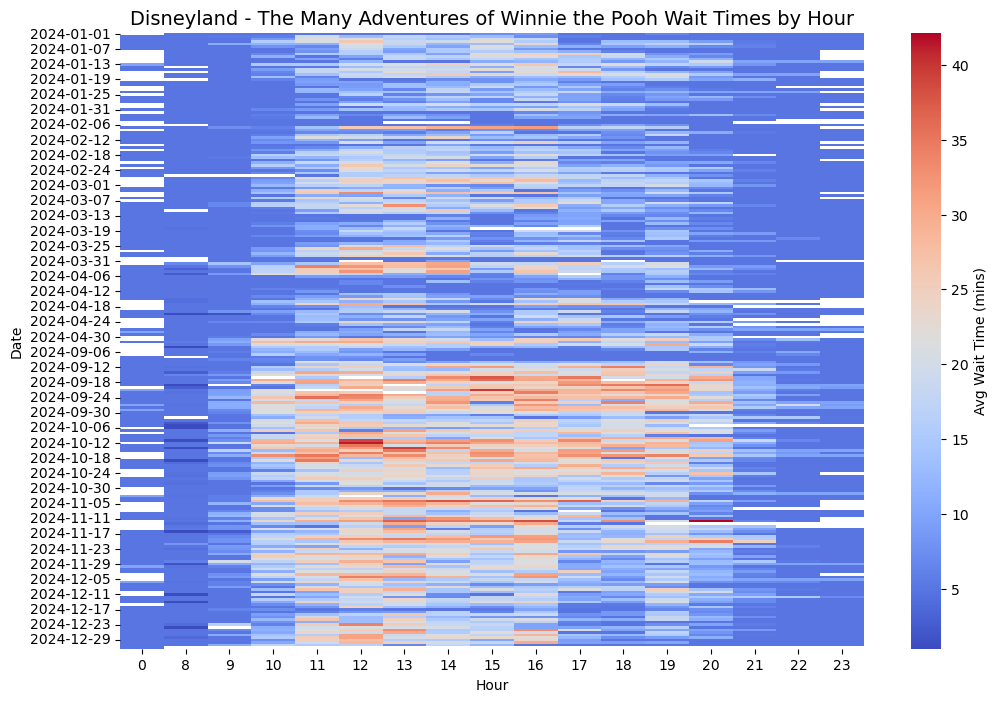

Creating heatmap for: Goofy's Sky School (California Adventure)
Heatmap saved as California Adventure_Goofy's_Sky_School_heatmap.png


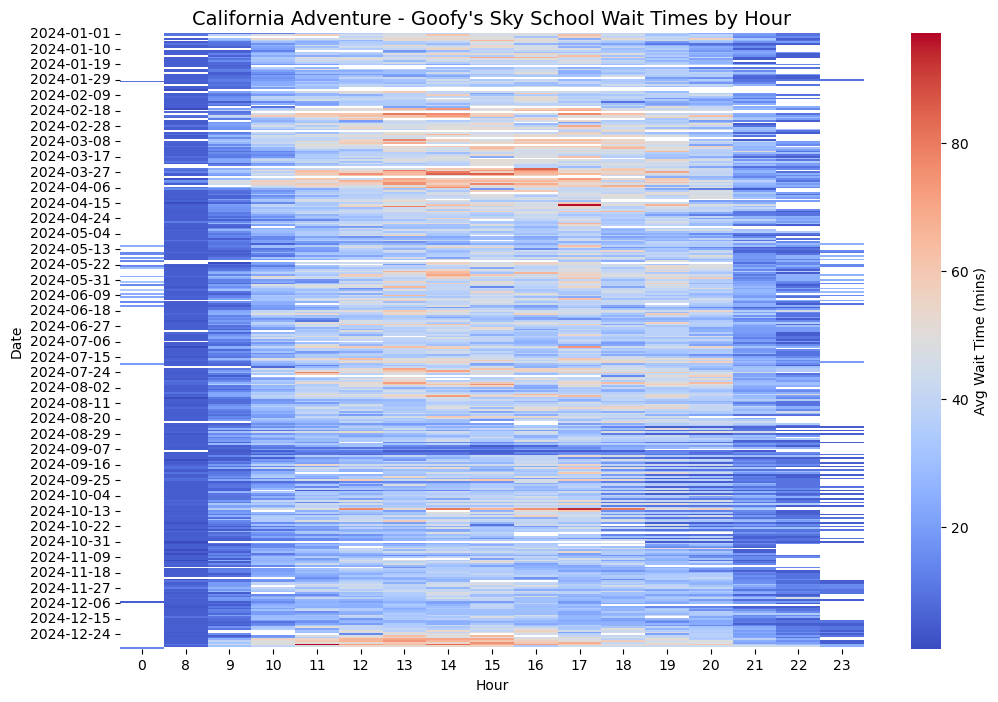

Creating heatmap for: Guardians of the Galaxy- Mission: BREAKOUT! (California Adventure)
Heatmap saved as California Adventure_Guardians_of_the_Galaxy-_Mission:_BREAKOUT!_heatmap.png


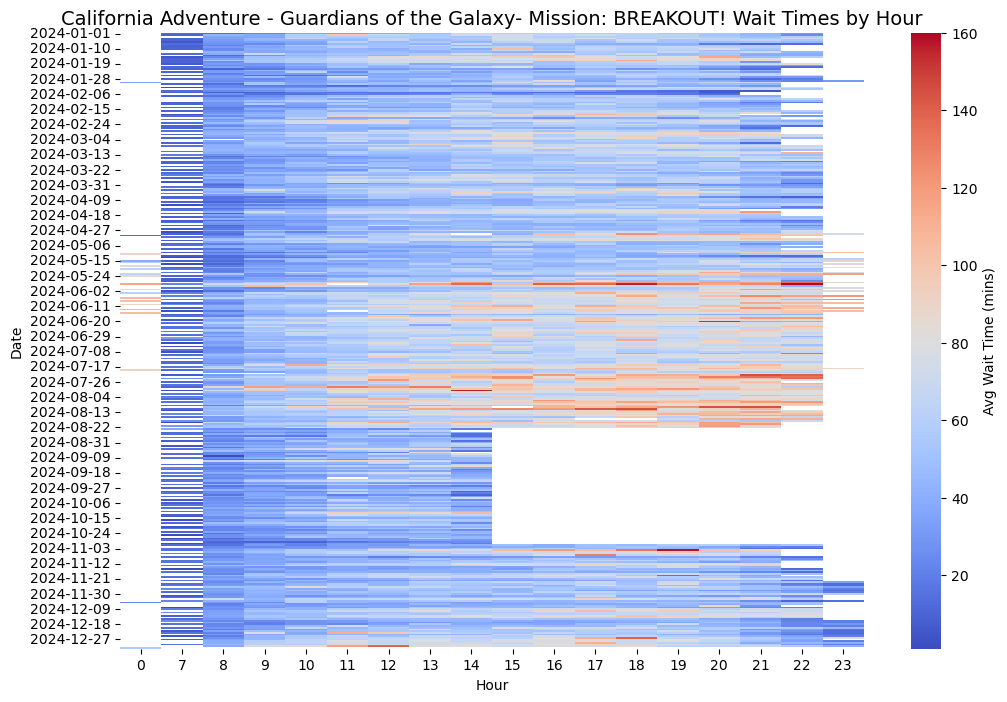

Creating heatmap for: Incredicoaster (California Adventure)
Heatmap saved as California Adventure_Incredicoaster_heatmap.png


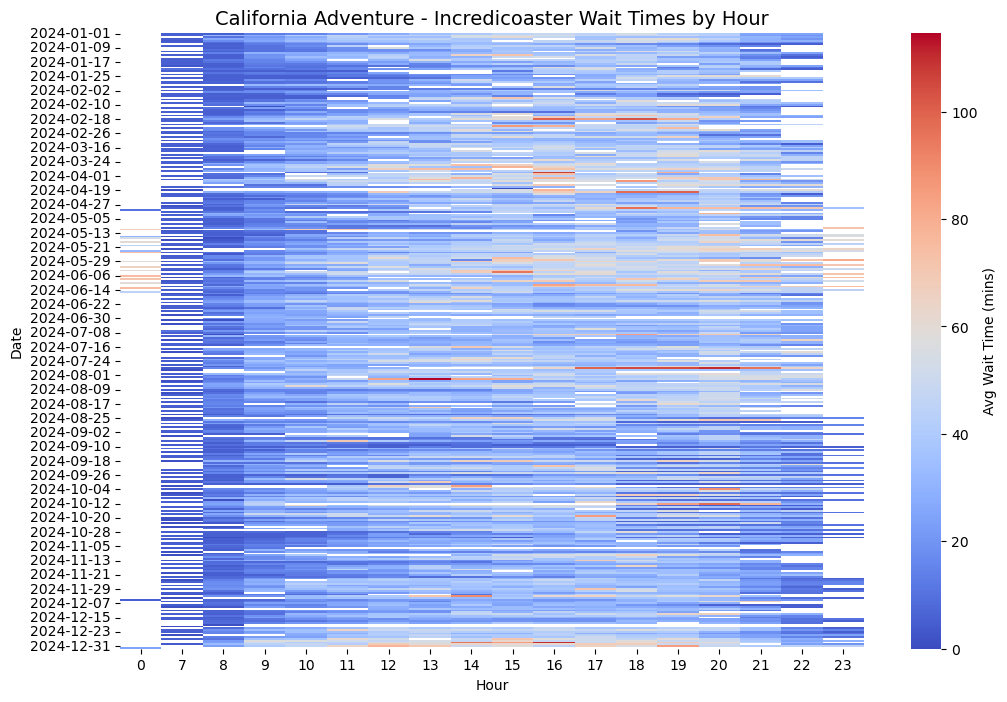

Creating heatmap for: Inside Out Emotional Whirlwind (California Adventure)
Heatmap saved as California Adventure_Inside_Out_Emotional_Whirlwind_heatmap.png


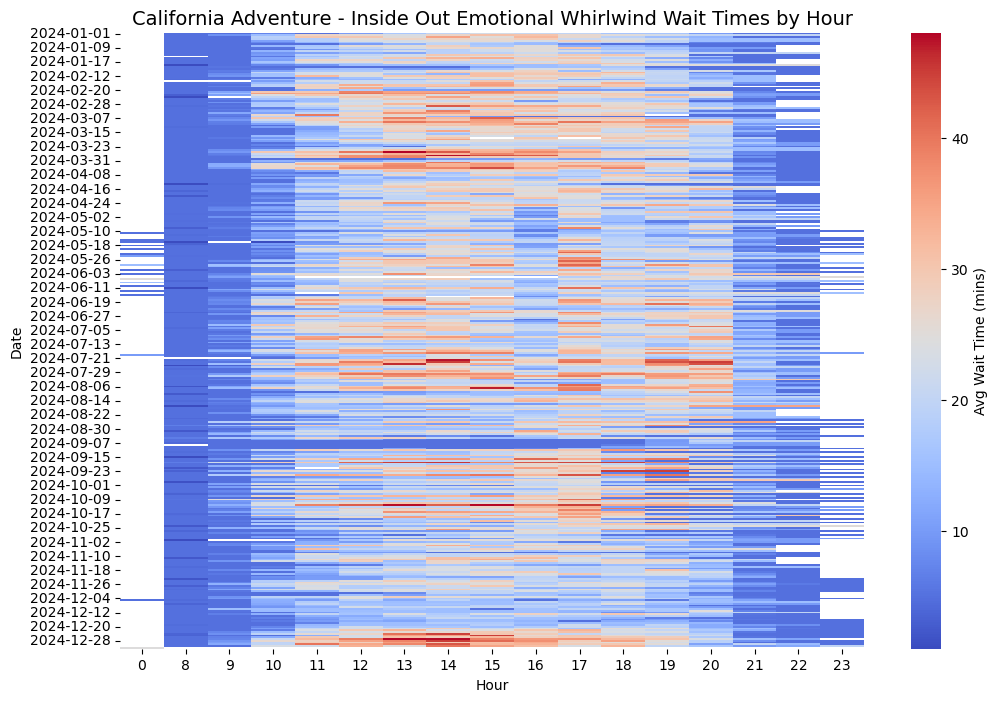

Creating heatmap for: Mater's Junkyard Jamboree (California Adventure)
Heatmap saved as California Adventure_Mater's_Junkyard_Jamboree_heatmap.png


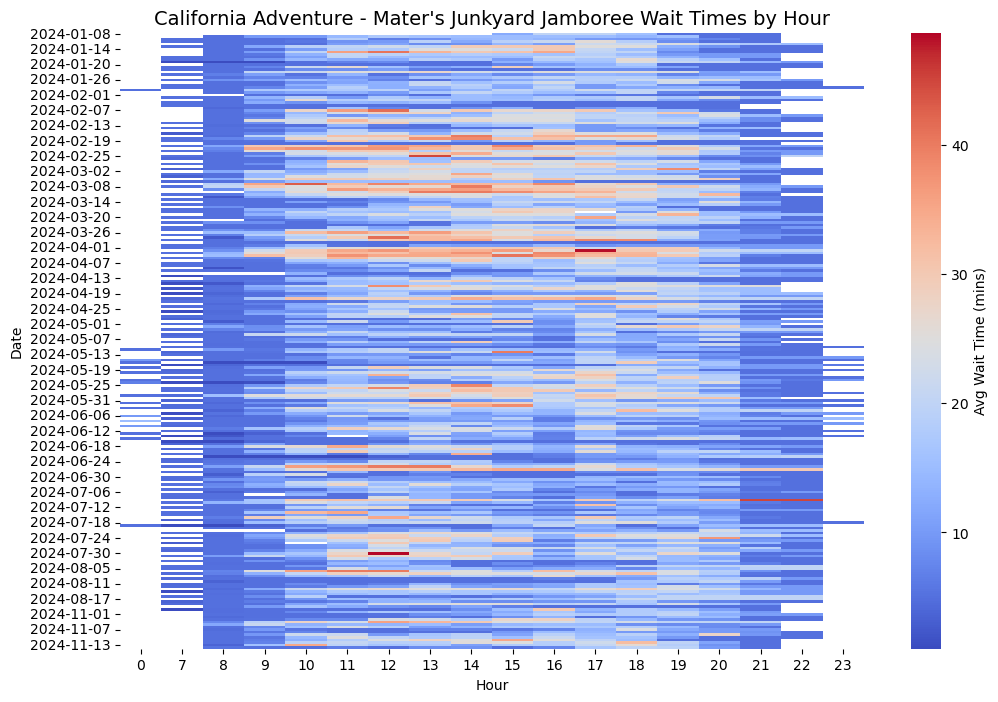

Creating heatmap for: Mickey's PhilharMagic (California Adventure)
Heatmap saved as California Adventure_Mickey's_PhilharMagic_heatmap.png


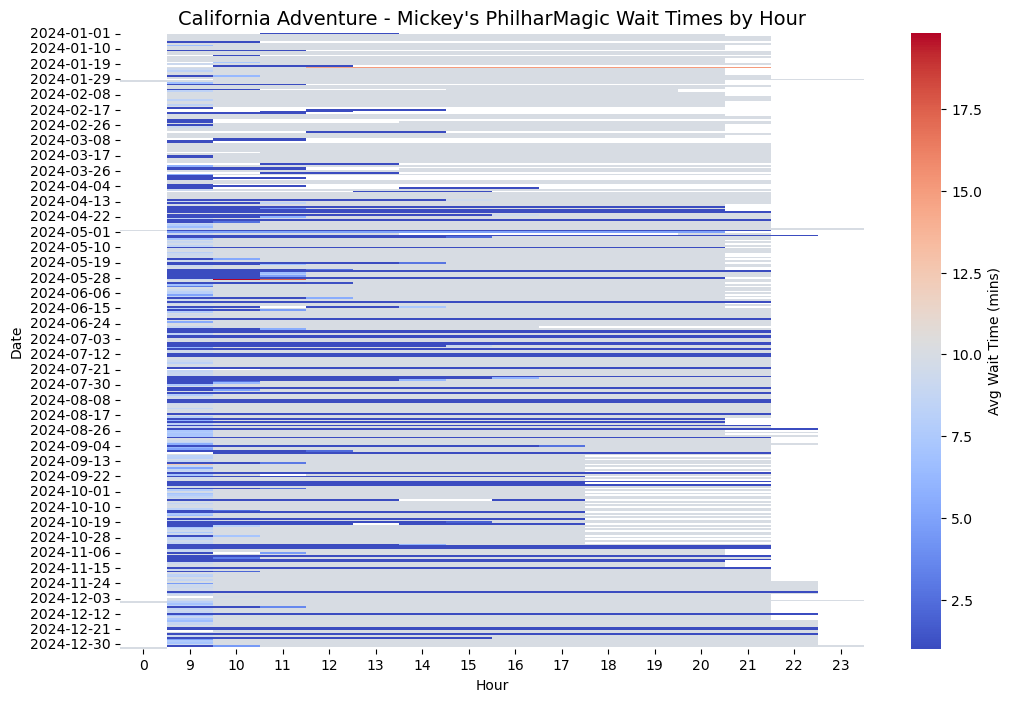

Creating heatmap for: Monsters Inc. Mike and Sulley to the Rescue! (California Adventure)
Heatmap saved as California Adventure_Monsters_Inc._Mike_and_Sulley_to_the_Rescue!_heatmap.png


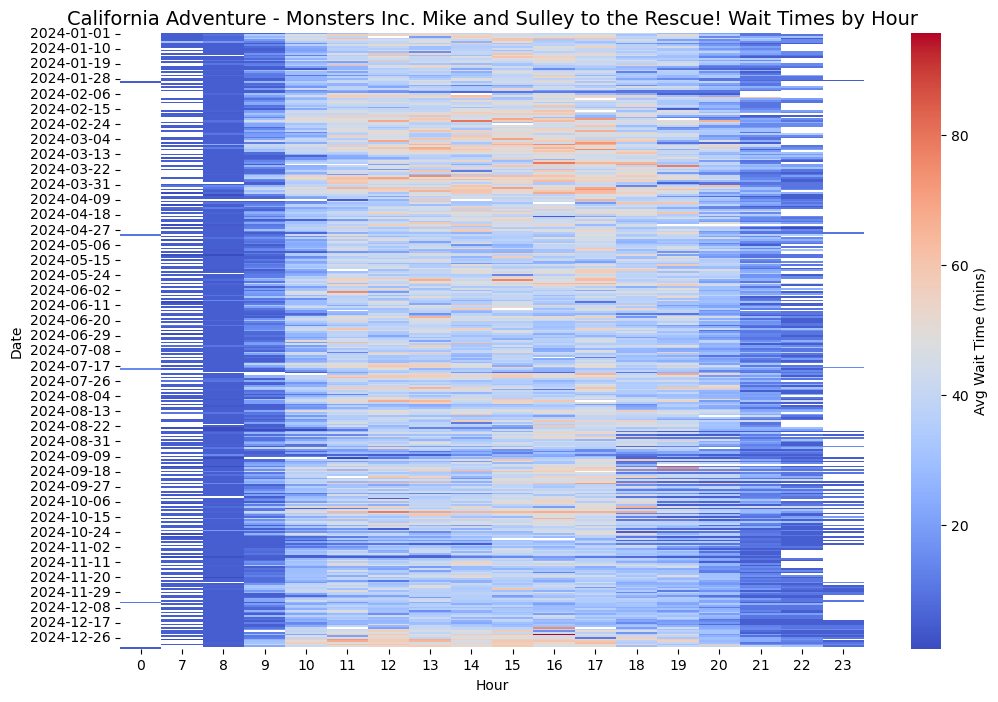

Creating heatmap for: Radiator Springs Racers (California Adventure)
Heatmap saved as California Adventure_Radiator_Springs_Racers_heatmap.png


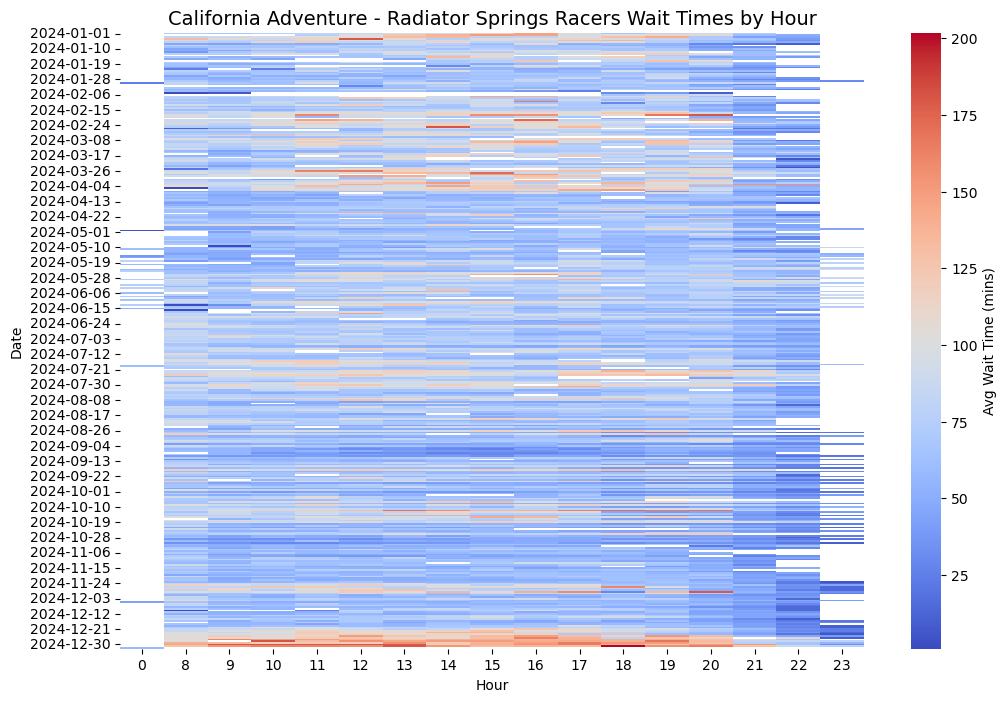

Creating heatmap for: Silly Symphony Swings (California Adventure)
Heatmap saved as California Adventure_Silly_Symphony_Swings_heatmap.png


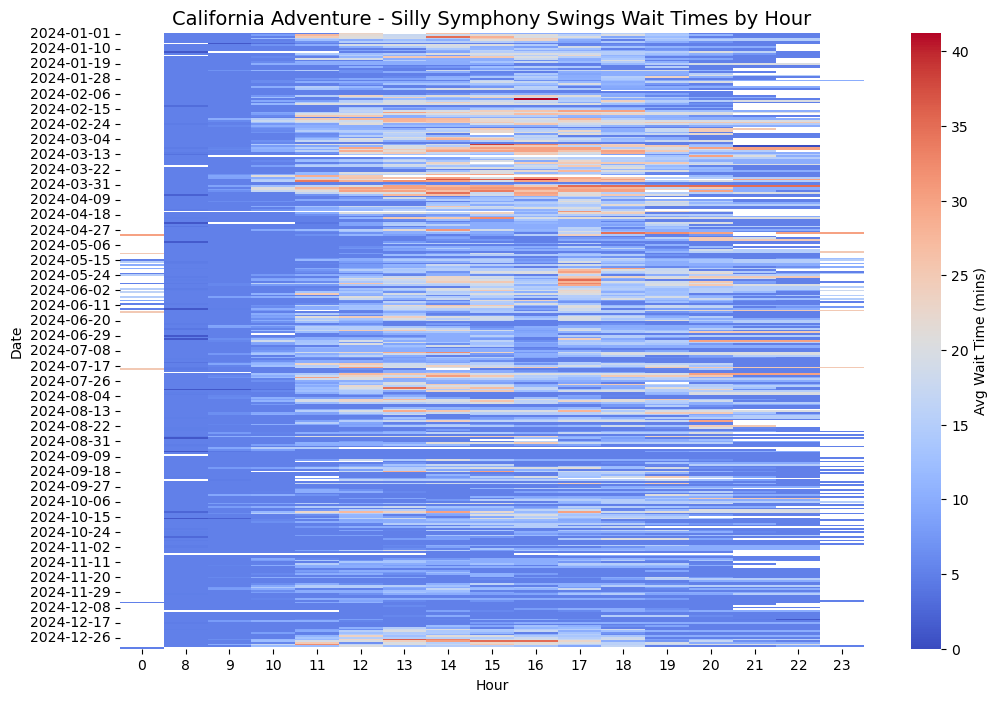

Creating heatmap for: Soarin' Around the World (California Adventure)
Heatmap saved as California Adventure_Soarin'_Around_the_World_heatmap.png


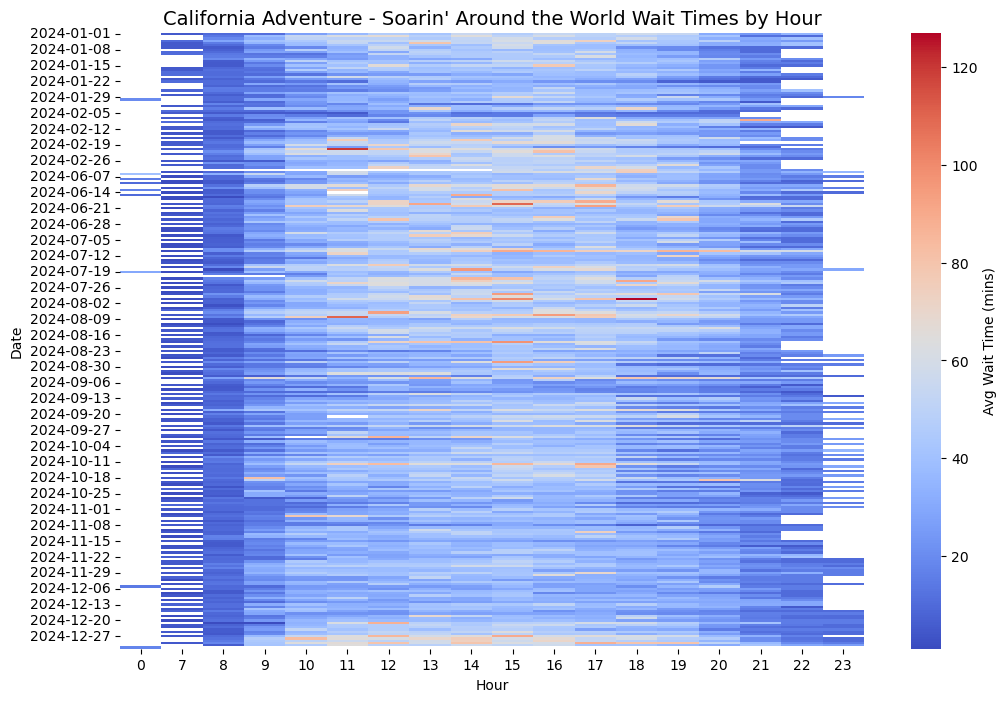

Creating heatmap for: The Little Mermaid - Ariel's Undersea Adventure (California Adventure)
Heatmap saved as California Adventure_The_Little_Mermaid_-_Ariel's_Undersea_Adventure_heatmap.png


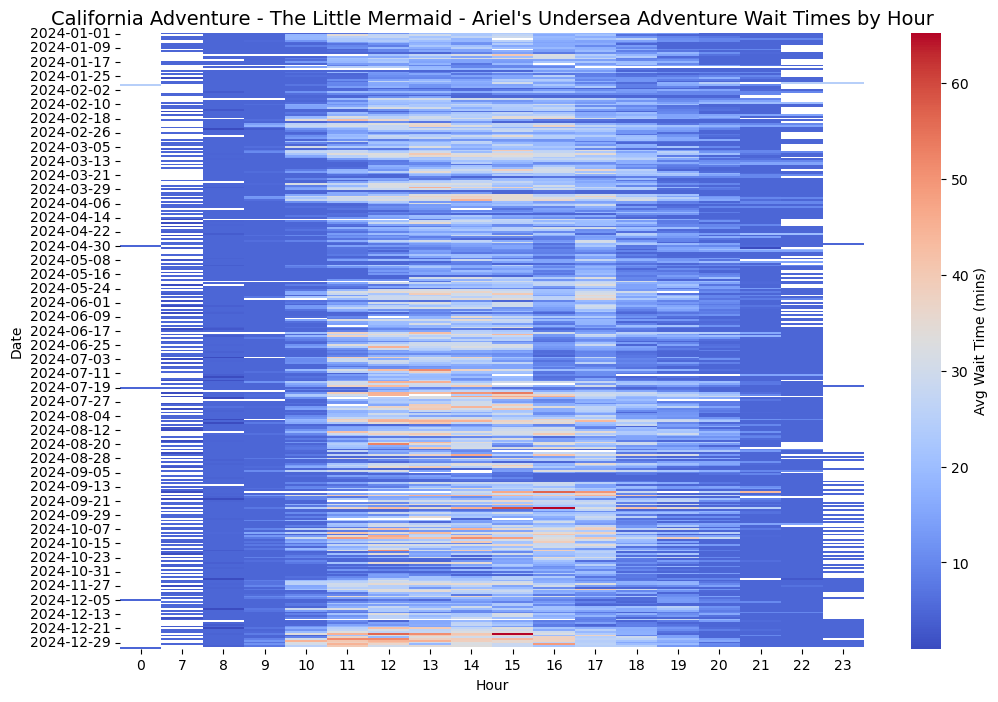

Creating heatmap for: Toy Story Midway Mania! (California Adventure)
Heatmap saved as California Adventure_Toy_Story_Midway_Mania!_heatmap.png


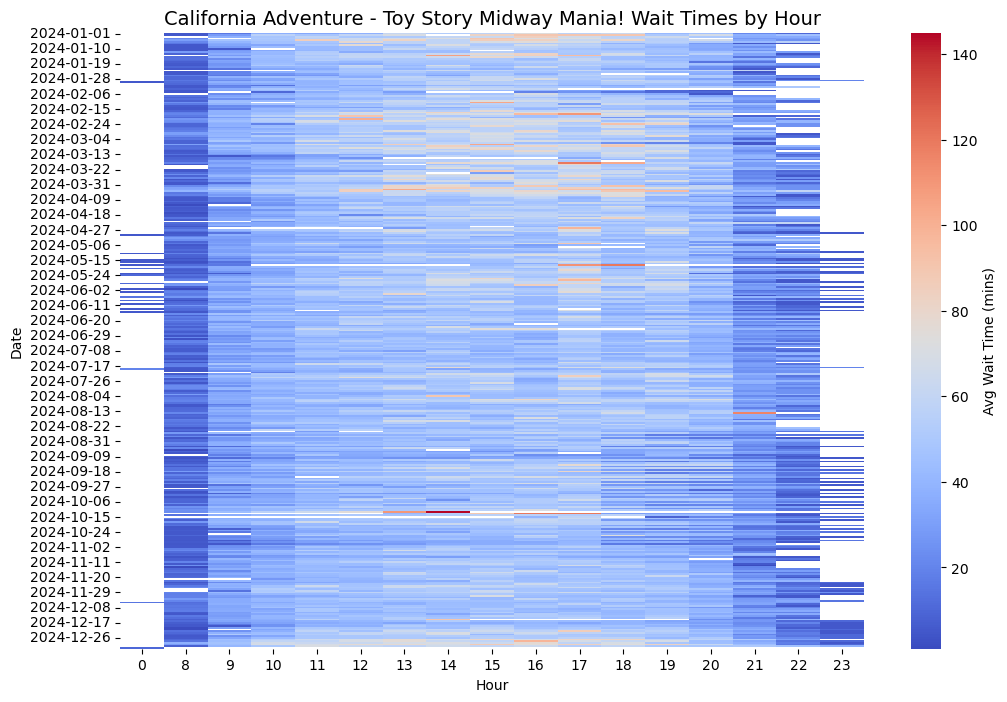

Creating heatmap for: WEB SLINGERS: A Spider-Man Adventure (California Adventure)
Heatmap saved as California Adventure_WEB_SLINGERS:_A_Spider-Man_Adventure_heatmap.png


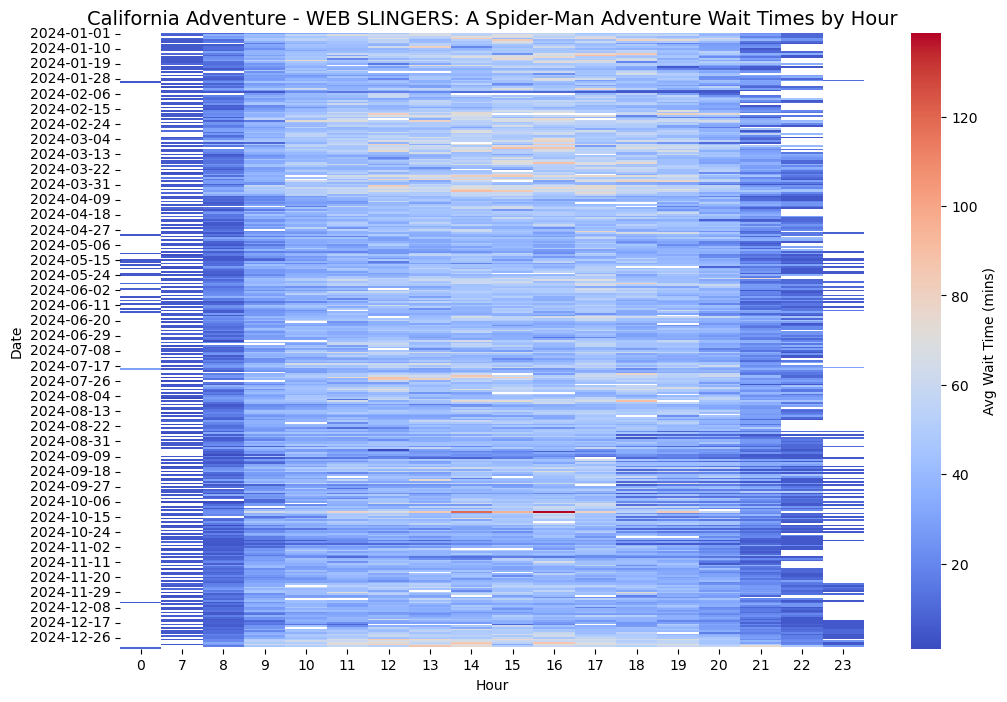


Saved heatmaps:
['.git', '.ipynb_checkpoints', "California Adventure_Goofy's_Sky_School_heatmap.png", 'California Adventure_Guardians_of_the_Galaxy-_Mission', 'California Adventure_Incredicoaster_heatmap.png', 'California Adventure_Inside_Out_Emotional_Whirlwind_heatmap.png', "California Adventure_Mater's_Junkyard_Jamboree_heatmap.png", "California Adventure_Mickey's_PhilharMagic_heatmap.png", 'California Adventure_Monsters_Inc._Mike_and_Sulley_to_the_Rescue!_heatmap.png', 'California Adventure_Radiator_Springs_Racers_heatmap.png', 'California Adventure_Silly_Symphony_Swings_heatmap.png', "California Adventure_Soarin'_Around_the_World_heatmap.png", "California Adventure_The_Little_Mermaid_-_Ariel's_Undersea_Adventure_heatmap.png", 'California Adventure_Toy_Story_Midway_Mania!_heatmap.png', 'California Adventure_WEB_SLINGERS', "California_Adventure_Goofy's_Sky_School_heatmap.png", 'California_Adventure_Guardians_of_the_Galaxy-_Mission', 'California_Adventure_Incredicoaster_heatmap.png'

In [20]:
import os

# Function to generate and save heatmaps for all rides
def generate_all_heatmaps(dataframe, park_name):
    rides = dataframe['Ride'].unique()  # Get all unique rides
    for ride in rides:
        print(f"Creating heatmap for: {ride} ({park_name})")
        plot_ride_heatmap(dataframe, ride, park_name)
        
        # Define filename and save heatmap
        filename = f"{park_name.replace(' ', '_')}_{ride.replace(' ', '_').replace('/', '_')}_heatmap.png"
        plt.savefig(filename, dpi=300, bbox_inches='tight')
        plt.close()  # Close the plot to free memory

# Generate and save heatmaps for both parks
generate_all_heatmaps(df_disneyland, "Disneyland")
generate_all_heatmaps(df_california_adv, "California Adventure")

# Confirm files were saved
print("\nSaved heatmaps:")
print(os.listdir())

